In [1]:
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from spiketopics.helpers import *

%matplotlib inline
sns.set_style('darkgrid')

Let's look at some statistics of the coded ethogram:

#Load and prep ethogram

In [2]:
ethofile = 'sql/etho.csv'
etho = pd.read_csv(ethofile)

/home/pearson/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1164: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [3]:
# rename some columns
etho = etho.rename(columns={'movieId': 'movie', 'frameNumber': 'frame'})
etho.head()

,movie,frameTime,frame,ethoCameraLabel,ethoCameraLevel,ethoCameraHolding,ethoCameraZoomingIn,ethoCameraZoomingOut,ethoCameraTracking,ethoCameraPanning,...,ethoCharge,ethoChase,ethoFlee,ethoThreaten,ethoMountedThreaten,ethoSubmit,ethoDisplace,ethoLeanAway,ethoAvoid,ethoBranchDisplay
0,1,0.0000,0,holding,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0.0333,1,holding,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0.0667,2,holding,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0.1000,3,holding,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0.1333,4,holding,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# get rid of categories that are either identifiers or have non-binary entries
edf = etho.drop(['frameTime', 'ethoCameraLabel', 'ethoFaceLabel',
                'ethoGenitalsLabel', 'ethoForageLabel', 'ethoAggressionLabel',
                'ethoRoughCountLabel'], axis=1)

In [5]:
edf.head()

,movie,frame,ethoCameraLevel,ethoCameraHolding,ethoCameraZoomingIn,ethoCameraZoomingOut,ethoCameraTracking,ethoCameraPanning,ethoCameraSlewing,ethoRoughCountLevel,...,ethoCharge,ethoChase,ethoFlee,ethoThreaten,ethoMountedThreaten,ethoSubmit,ethoDisplace,ethoLeanAway,ethoAvoid,ethoBranchDisplay
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,3,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,4,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
def plot_code_durations(arr):
    """
    Given an array, get distributions of durations of each coded value.
    """
    _, runlens, values = rle(arr)
    codes = list(np.unique(values))
    for c in codes:
        rlens = runlens[values == c]
        plt.hist(np.log(rlens).ravel(), bins=50, normed=True, alpha=0.25, label=str(c));

/home/pearson/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


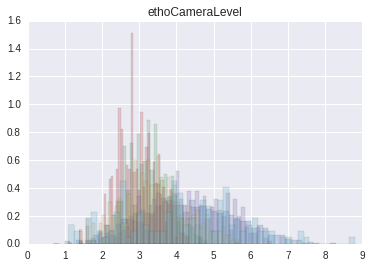

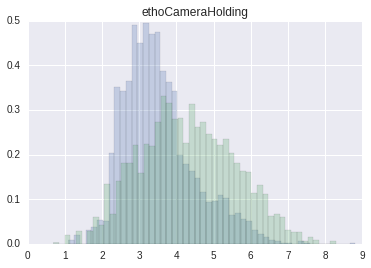

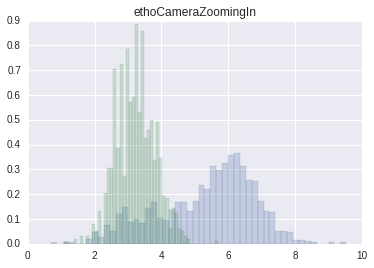

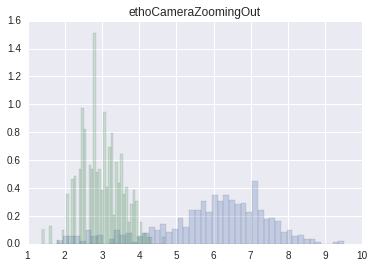

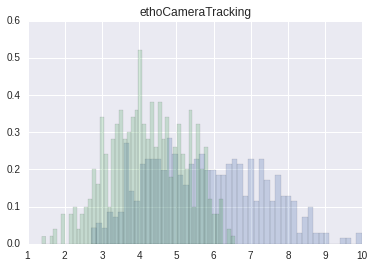

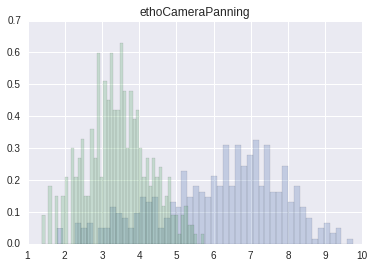

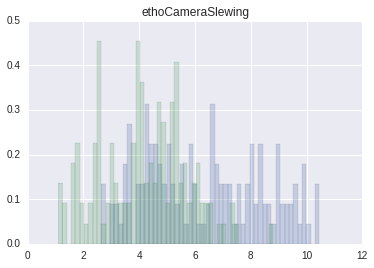

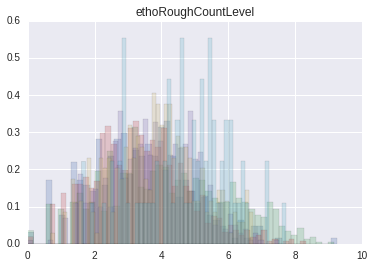

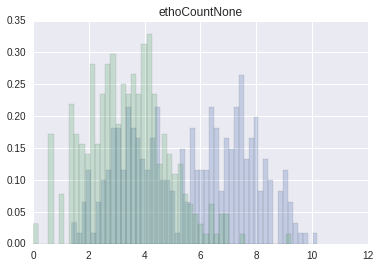

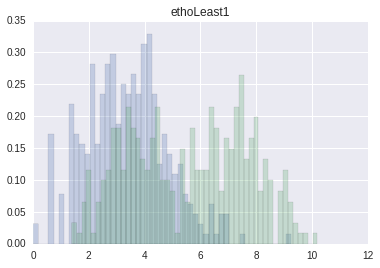

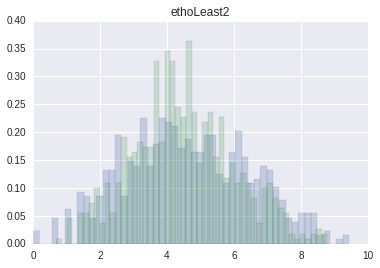

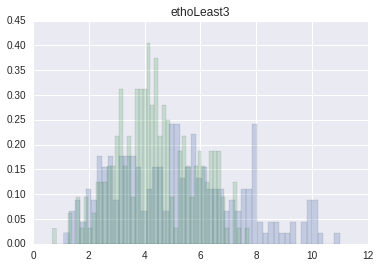

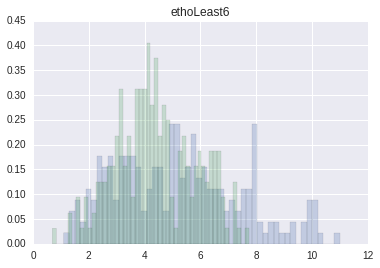

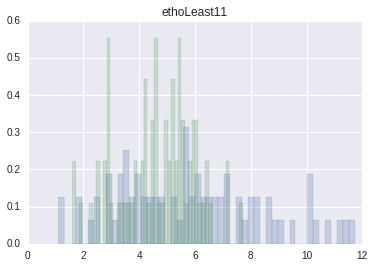

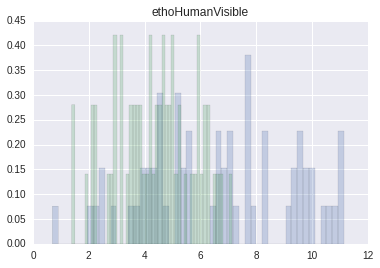

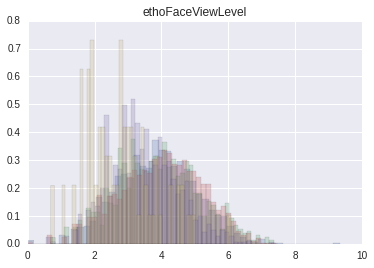

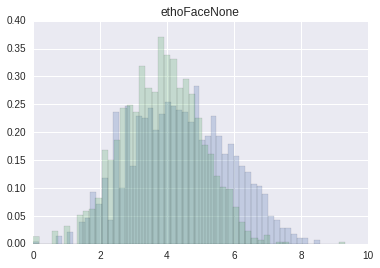

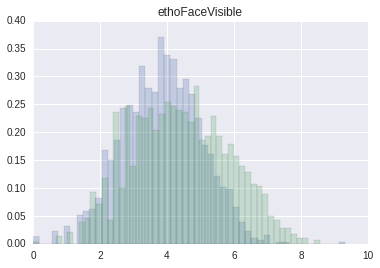

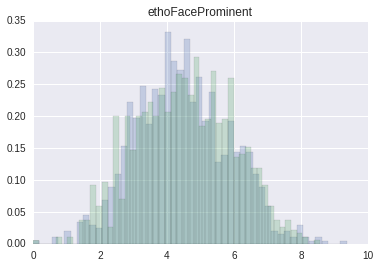

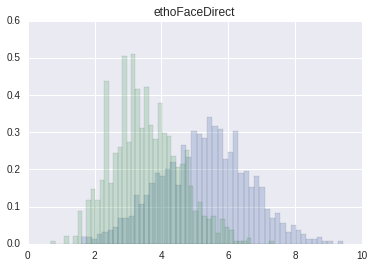

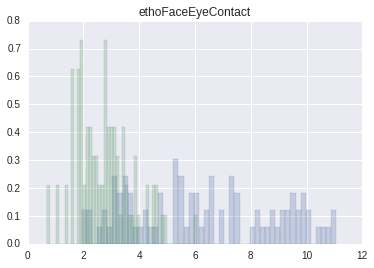

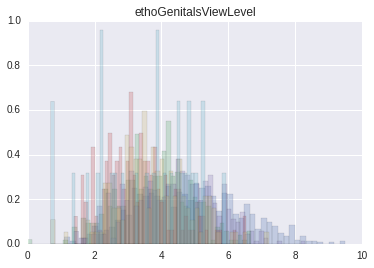

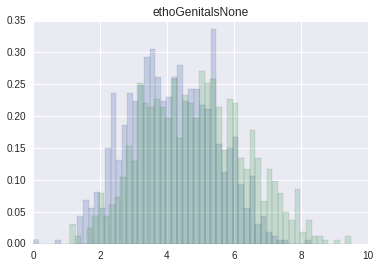

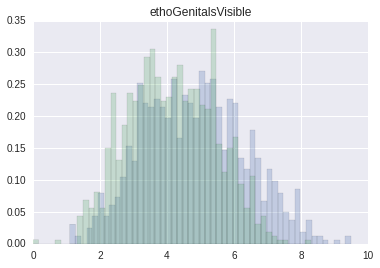

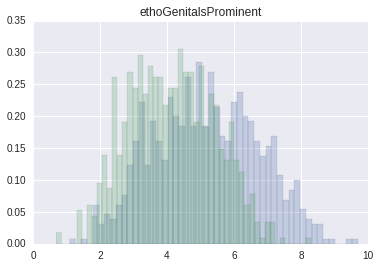

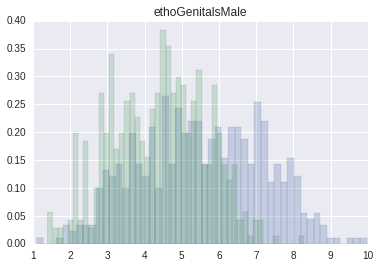

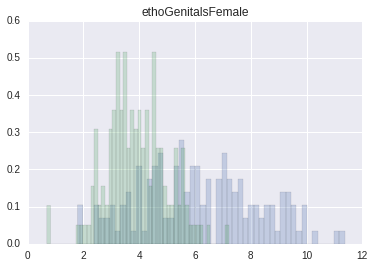

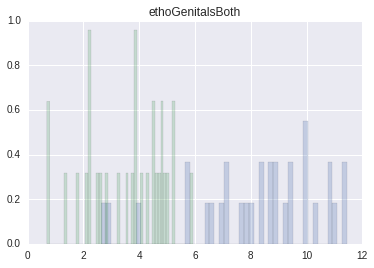

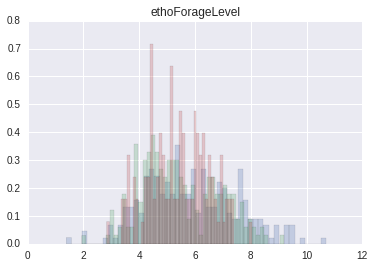

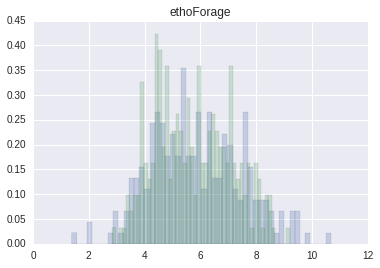

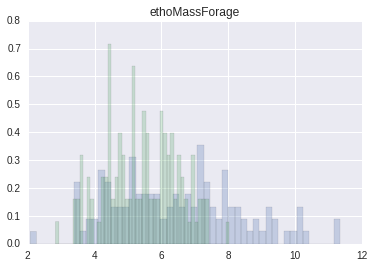

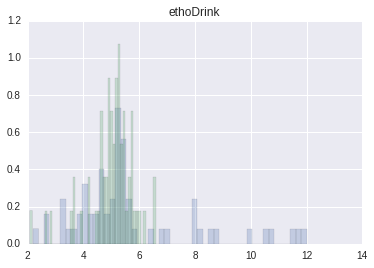

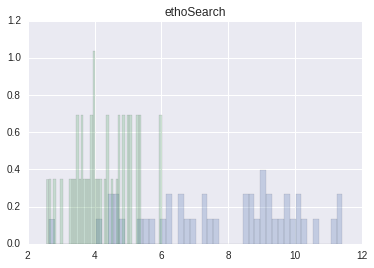

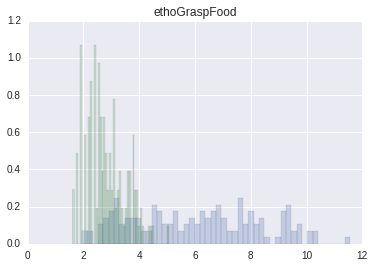

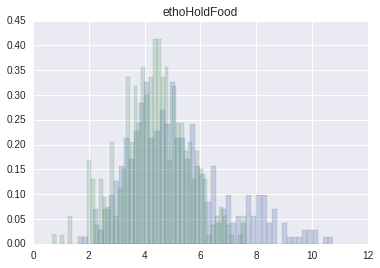

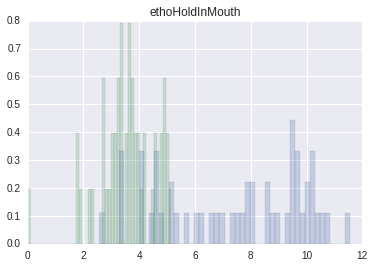

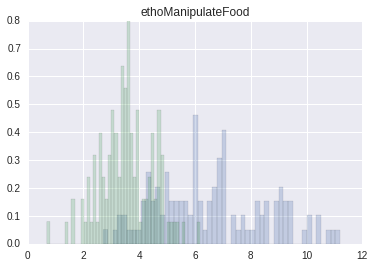

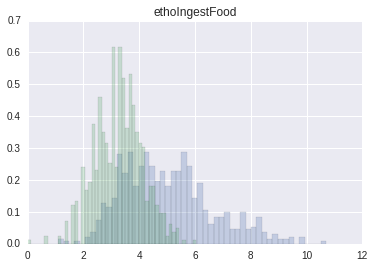

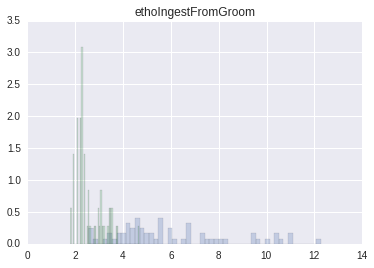

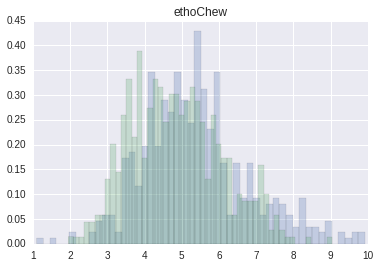

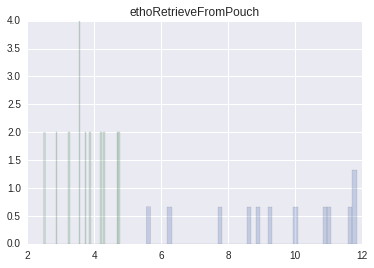

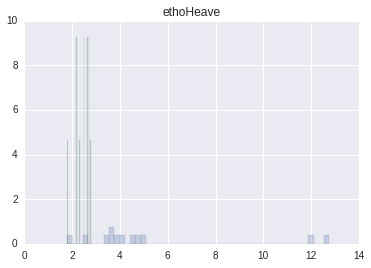

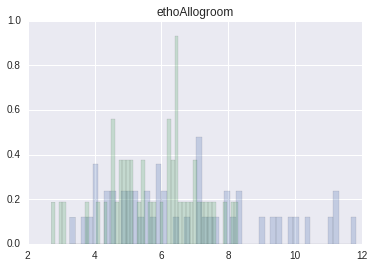

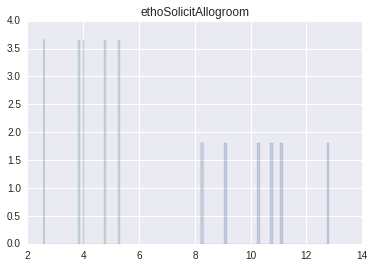

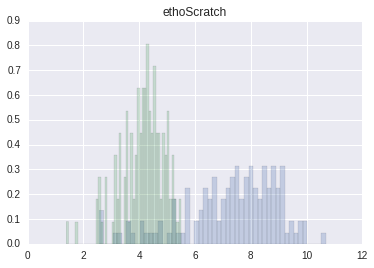

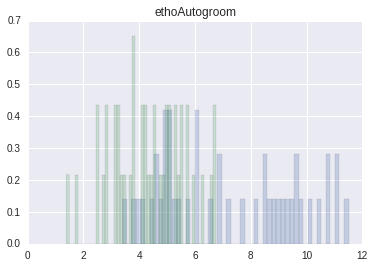

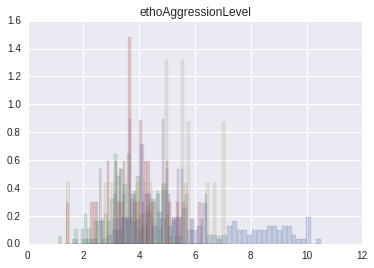

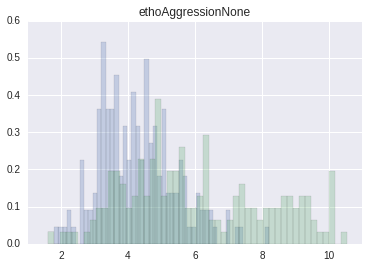

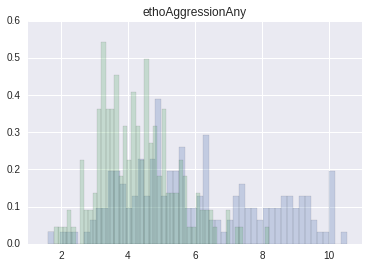

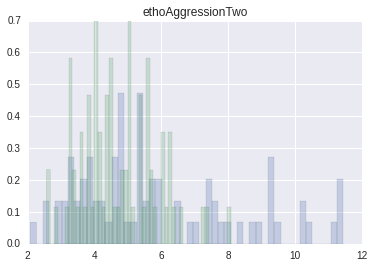

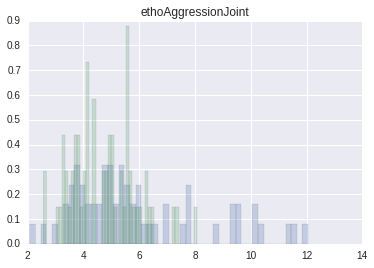

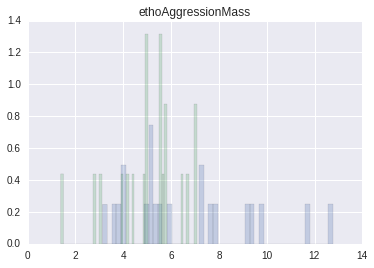

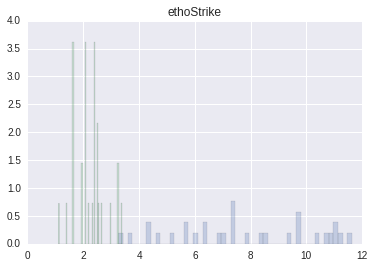

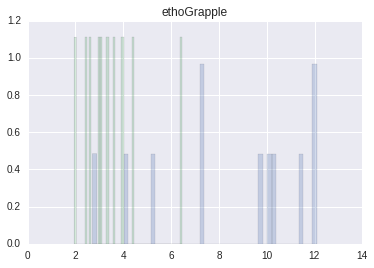

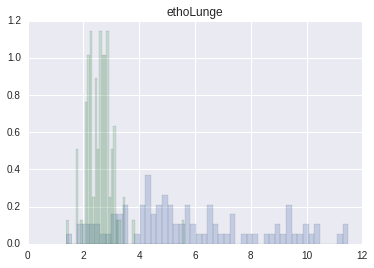

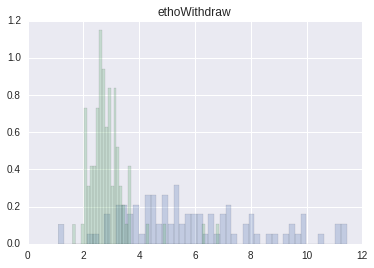

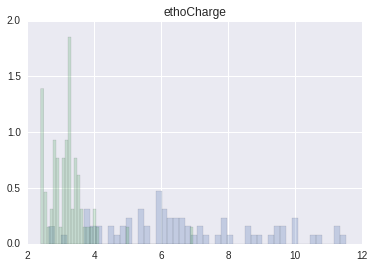

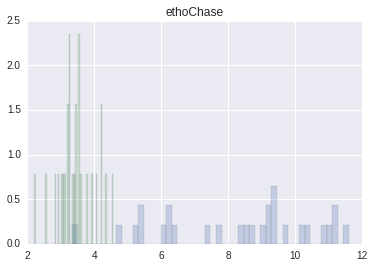

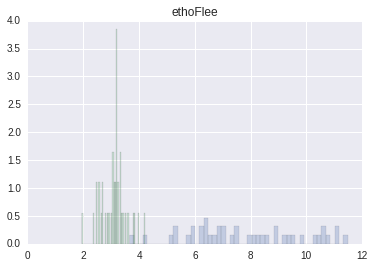

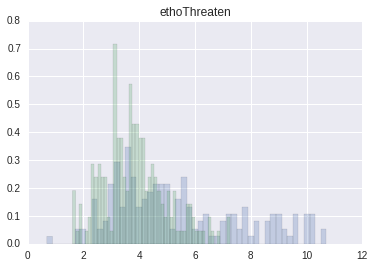

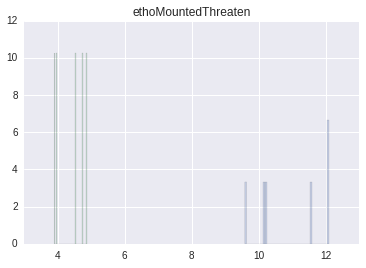

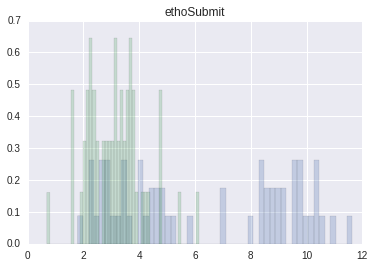

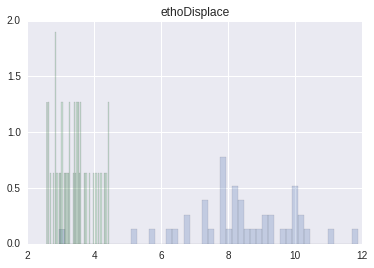

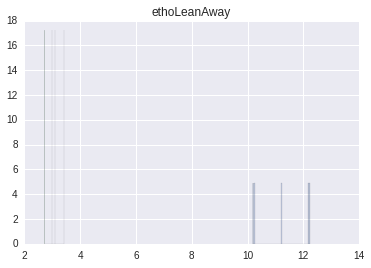

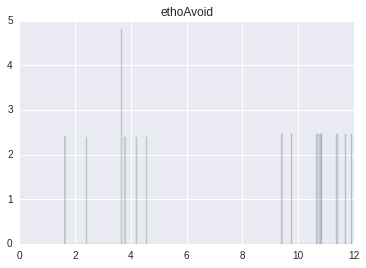

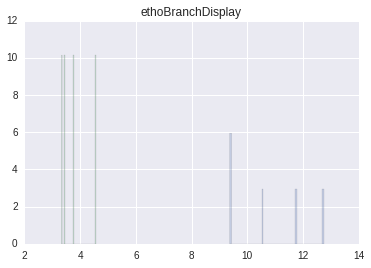

In [7]:
for col in edf:
    if col not in ['movie', 'frame']:
        plt.figure()
        plot_code_durations(edf[col].values)
        plt.title(col)